# Geometric transformation
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter('ignore')

import gc

from os import path
import sys
sys.path.append(path.abspath('..'))

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

from src.config import DATA_PATH

# Resize and Rescale

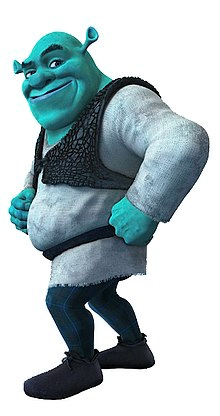

In [7]:
image = cv2.imread(path.join(DATA_PATH, "shrek.jpg"))
Image.fromarray(image)

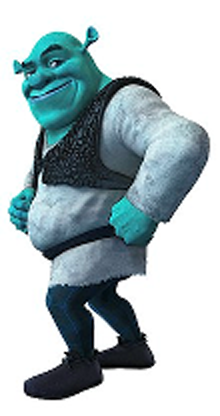

In [21]:
interpolation = cv2.INTER_CUBIC # cv2.INTER_LINEAR
image_scaled = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=interpolation)
image_scaled = cv2.resize(image_scaled, None, fx=2, fy=2, interpolation=interpolation)

Image.fromarray(image_scaled)

# Affine

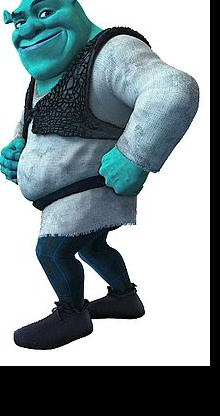

In [47]:
# translation
img_size = image.shape[1::-1]
M = np.float32([[1, 0, -10], [0, 1, -50]])
image_transformed = cv2.warpAffine(image, M, img_size)
Image.fromarray(image_transformed)

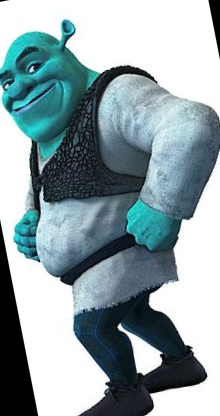

In [67]:
# rotation
rows, cols, _ = image.shape
M = cv2.getRotationMatrix2D((cols/2, rows*1/3), 11, 1.12)
image_transformed = cv2.warpAffine(image, M, (cols, rows))
Image.fromarray(image_transformed)

In [68]:
# hard affine
image.shape

(416, 220, 3)

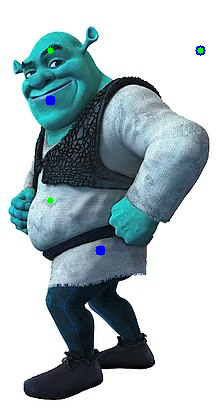

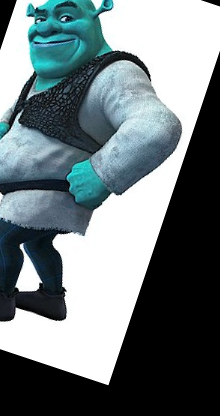

In [77]:
# points1 = np.float32([[50, 50], [200, 50], [50, 200]])
# points2 = np.float32([[50, 100], [200, 50], [100, 250]])
points2 = np.float32([[200, 50], [50, 200], [50, 50]])
points1 = np.float32([[200, 50], [100, 250], [50, 100]])


M = cv2.getAffineTransform(points1, points2)
image_transformed = cv2.warpAffine(image, M, (cols, rows))

image_with_points = image.copy()
for point in points1:
    image_with_points = cv2.circle(image_with_points, tuple(point),
                                   5, (0, 0, 255), -1)
for point in points2:
    image_with_points = cv2.circle(image_with_points, tuple(point),
                                   3, (0, 255, 0), -1)

Image.fromarray(image_with_points)
Image.fromarray(image_transformed)

# Pespective

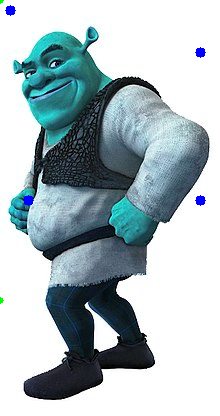

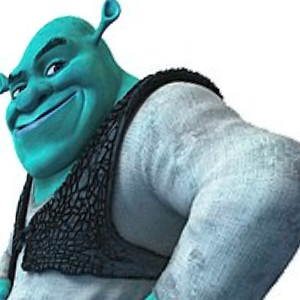

In [82]:
points1 = np.float32([[10, 10],
                      [200, 52],
                      [28, 200],
                      [200, 200]])
points2 = np.float32([[0, 0],
                      [300, 0],
                      [0, 300],
                      [300, 300]])

M = cv2.getPerspectiveTransform(points1, points2)
image_transformed = cv2.warpPerspective(image, M, (300, 300))

image_with_points = image.copy()
for point in points1:
    image_with_points = cv2.circle(image_with_points, tuple(point),
                                   5, (0, 0, 255), -1)
for point in points2:
    image_with_points = cv2.circle(image_with_points, tuple(point),
                                   3, (0, 255, 0), -1)

Image.fromarray(image_with_points)
Image.fromarray(image_transformed)

# Polar

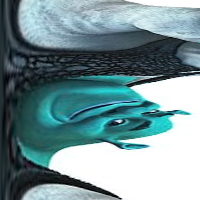

In [89]:
# for fun)
image_transformed = cv2.warpPolar(image, (200, 200), (100, 100),
                                  100, cv2.INTER_LINEAR + cv2.WARP_POLAR_LINEAR)
Image.fromarray(image_transformed)